In [1]:
import numpy as np
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
from sympy import symbols, diff
%matplotlib inline

In [2]:
class Multi:
    def __init__(self,X,Y):
        self.x = X
        self.y = Y
        self.neighboors = []
        self.name = None
        self.val = None
        self.der = None
        self.s = str(self.x.name) + '*' + str(self.y.name)
        self.nameG()
    def calc(self):
        self.val = self.x.val * self.y.val
    def derivative(self,X):
        self.der = X
    def nameG(self):
        self.name = str(self.x.name) + '*' + str(self.y.name)
class Sub:
    def __init__(self,X,Y):
        self.x = X
        self.y = Y
        self.neighboors = []
        self.name = None
        self.val = None
        self.s = str(self.x.name) + '-' + str(self.y.name)
        self.der = None
        self.nameG()
    def calc(self):
        self.val = self.x.val - self.y.val
    def derivative(self,X):
        self.der = X
    def nameG(self):
        self.name = str(self.x.name) + '-' + str(self.y.name)
class Div:
    def __init__(self,X,Y):
        self.x = X
        self.y = Y
        self.neighboors = []
        self.name = None
        self.val = None
        self.s = str(self.x.name) + '/' + str(self.y.name)
        self.der = None
        self.nameG()
    def calc(self):
        self.val = self.x.val / self.y.val
    def derivative(self,X):
        self.der = X
    def nameG(self):
        self.name = str(self.x.name) + '/' + str(self.y.name)
class Add:
    def __init__(self,X,Y):
        self.x = X
        self.y = Y
        self.neighboors = [] 
        self.name = None
        self.val = None
        self.s = str(self.x.name) + '+' + str(self.y.name)
        self.der = None
        self.nameG()
    def calc(self):
        self.val = self.x.val + self.y.val
    def derivative(self,X):
        self.der = X
    def nameG(self):
        self.name = str(self.x.name) + '+' + str(self.y.name)
class PlaceHolder:
    def __init__(self,X):
        self.neighboors = []
        self.name = str(X)
        self.val = None
        self.nodeName = str(X)
        self.der = None
        self.nameG()
    def nameG(self):
        self.name = self.name
    def val(self,X):
        self.val = X
    def derivative(self,X):
        self.der = X
    def appendN(self,Y):
        self.neighboors.append(Y)

In [3]:
class Graph :
    def __init__(self):
        self.varFirst = []
        self.varSecond = []
        self.op = []
        self.weigths =[]
        self.neig={}
        self.data = []
        self.graph = []
        self.drawM = []
        self.lastOp = None
        self.G=None
    def addOperation(self,X,Y,operation):
        self.obj = PlaceHolder(X)
        self.Input = PlaceHolder(Y)
        self.oper=eval(operation)(self.obj,self.Input)
        self.op.append(self.oper)
        self.data.append({'First Variable' : self.obj.name ,'Second Variable' :self.Input.name, 'Operation':operation})
        self.connections(self.obj,self.Input,self.oper)
        #self.createFrame()
    def combineOperation(self,opIndex,X,operation):
        self.obj = self.op[opIndex]
        self.Input = PlaceHolder(X)
        self.oper=eval(operation)(self.obj,self.Input)
        self.op.append(self.oper)
        self.data.append({'First Variable' : self.obj.name ,'Second Variable' :self.Input.name, 'Operation':operation})
        self.connections(self.obj,self.Input,self.oper)
    def combineFull(self,opIndex,X,operation):
        self.obj = self.op[opIndex]
        self.Input = self.op[X]
        self.oper=eval(operation)(self.op[opIndex],self.op[X])
        self.op.append(self.oper)
        self.data.append({'First Variable' : self.obj.name ,'Second Variable' :self.Input.name, 'Operation':operation})
        self.connections(self.obj,self.Input,self.oper)
    def connections(self,X,Y,Z):
        self.graph.append([X,Z,0])
        self.graph.append([Y,Z,0])
        self.drawM.append([X.name,Z.name,0])
        self.drawM.append([Y.name,Z.name,0])
        self.lastOp = Z
    def neighboor(self):
        for s,t,w in self.graph:
            s.neighboors.append(t)
        for s,t,w in self.graph:
            self.neig.update({s:s.neighboors})
    def draw(self, color = 'lightblue'):
        """
            Usage of networkx for visualisation
        """
        
        self.graph.append([self.graph[-1][1],PlaceHolder(0),0])
        self.graph[-1][-2].val = 0
        self.drawM.append([self.drawM[-1][1],0,0])
        self.G = nx.DiGraph()
        self.G.add_weighted_edges_from(self.drawM)
        plt.figure(figsize=(20,10))
       
        pos = nx.spring_layout(self.G)  # positions for all nodes
        nx.draw(self.G, pos, node_size=900, node_color=color, font_size=10, with_labels=True)
        nx.draw_networkx_edge_labels(self.G, pos, font_size=10,  edge_labels = nx.get_edge_attributes(self.G,'weight'))

In [4]:
class BasicC:
    def __init__(self, string):
        self.G = Graph()
        self.count = 0
        self.z = []
        self.memo = []
        self.s = string
        self.se =''.join(self.s.split())
        self.space =' '.join(self.se)
        self.space = self.space.replace(')', '')
        self.space = self.space.split('(')
        self.final = []
        self.process()
        self.reversed = self.final[::-1]
        print(self.reversed)
        self.framize(True)
        self.G.draw()
        self.G.neighboor()
    def framize(self,boolean):
        try:
            if boolean and len(self.reversed[self.count])>=3:
                self.G.addOperation(self.reversed[self.count][0],self.reversed[self.count][2],self.reversed[self.count][1])
                self.z.append(self.reversed[self.count][:3])
                self.reversed[self.count] = self.reversed[self.count][3:]
                print(len(self.reversed))
                self.framize(False)
            elif (not(self.reversed[self.count] == []) and (len(self.reversed[self.count])>1)):
                self.G.combineOperation(len(self.G.op)-1,self.reversed[self.count][1],self.reversed[self.count][0])
                self.z.append([self.z[-1] , self.reversed[self.count][0],self.reversed[self.count][1]])
                self.reversed[self.count] = self.reversed[self.count][2:]
                self.framize(False)
            elif len(self.reversed[self.count])==1:
                self.G.combineFull(len(self.G.op)-1,self.memo,self.reversed[self.count][0])
                self.z.append([self.z[-1] , self.reversed[self.count][0],self.memo])
                self.reversed[self.count] = []
                self.framize(False)
            else:
                self.count+=1
                self.memo = len(self.G.op)-1
                self.framize(True)
        except:
            print('Finish')
    def process(self):
        for z in self.space:
            self.final.append([])
            for i in z:
                if not(i == ' '):
                    self.final[-1].append(self.helper(''.join(i.split())))
    def helper(self,phase):
        self.phase = phase.translate(str.maketrans({'*': 'Multi', '+': 'Add', '/' : 'Div', '-' : 'Sub'}))
        return self.phase
        

In [18]:
class ForwardProp:
    def __init__(self,var,gr):
        self.var = var
        self.index = [s for s,w in self.var]
        self.g = gr
        self.values = []
        self.G = nx.DiGraph()
        self.G.add_weighted_edges_from(self.g.G.graph)
        self.Topologic = None
        self.RTopologic = None
        self.Topologic_Order()
        
    def Topologic_Order(self):
        self.Topologic =list(nx.topological_sort(self.G))
        self.RTopologic =list(reversed(list(nx.topological_sort(self.G))))
    def RTopologic_Order(self):
        self.RTopologic =list(reversed(list(nx.topological_sort(self.G))))
    def addVars(self):
        for i in self.Topologic:
            try:
                string = type(i).__name__
                if string == 'PlaceHolder':
                    i.name = self.var[self.index.index(i.name)][1]
                    i.val = float(i.name)
                    print(i.val)
                else:
                    i.nameG()
                    print(i.name)
            except:
                print(i.name)
    def BackwardSess(self):
        self.values = np.array(list(reversed(list(self.values))),dtype=float)
        self.gradiants = np.gradient(self.values)
        for i in self.RTopologic:

                    self.last, self.gradiants = self.gradiants[0], self.gradiants[1:]
                    i.derivative(abs(self.last))
                    print(i.der)
            
    def Forwardsess(self):
        self.addVars()
        for i in self.Topologic:
            try:
                string = type(i).__name__
                if string == 'PlaceHolder':
                    if i.val == None:
                        print('name = ' + i.name)
                    else:
                        self.values.append(i.val)
                else:
                    i.calc()
                    print(i.val)
                    self.values.append(i.val)
            except:
                print(i.x)
        self.Topologic[-1].val = self.Topologic[-2].val
        self.values.append(self.values[-1])
        self.RTopologic_Order()
    def info(self):
        self.prM = self.Topologic[:-1]
        return {i.name:i.neighboors for i in self.prM}

In [19]:
def draw(drawG, color = 'lightblue'):
        """
            Usage of networkx for visualisation
        """
        G = nx.DiGraph()
        G.add_weighted_edges_from(drawG)
        plt.figure(figsize=(20,10))
       
        pos = nx.spring_layout(G)  # positions for all nodes
        nx.draw(G, pos, node_size=900, node_color=color, font_size=10, with_labels=True)
        nx.draw_networkx_edge_labels(G, pos, font_size=10,  edge_labels = nx.get_edge_attributes(G,'weight'))

[['x', 'Div', 'y', 'Add', 'z'], ['a', 'Multi', 'b', 'Multi']]
2
2
Finish
5.0
4.0
4*5
10.0
9.0
8.0
8/9
8/9+10
4*5*8/9+10
0
20.0
0.8888888888888888
10.88888888888889
217.77777777777777
0.0
108.88888888888889
5.444444444444445
108.44444444444444
1.4444444444444446
4.055555555555555
1.0
5.5
3.0
7.5


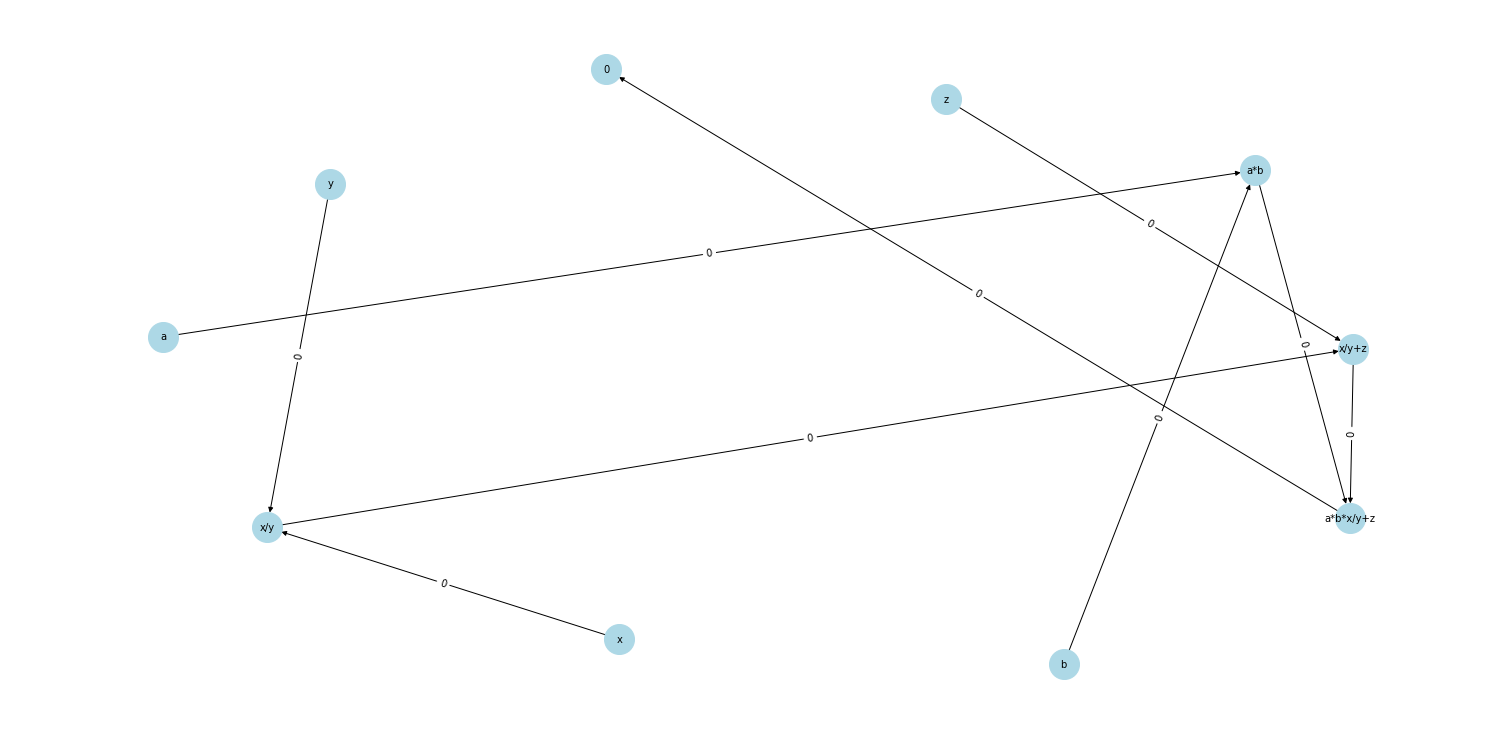

In [26]:
frame = BasicC('a*b*(x/y+z)')
liste = [['a',4],['b',5],['x',8],['y',9],['z',10]]
g = ForwardProp(liste,frame)
g.Forwardsess()
frame.G.neig
g.info()
grap = g.Topologic[:-1]
g.BackwardSess()
x =[[i.val,i.neighboors[0].val,i.val] for i in grap]

y =[[i.neighboors[0].val,i.val,i.der] for i in g.RTopologic[1:]]


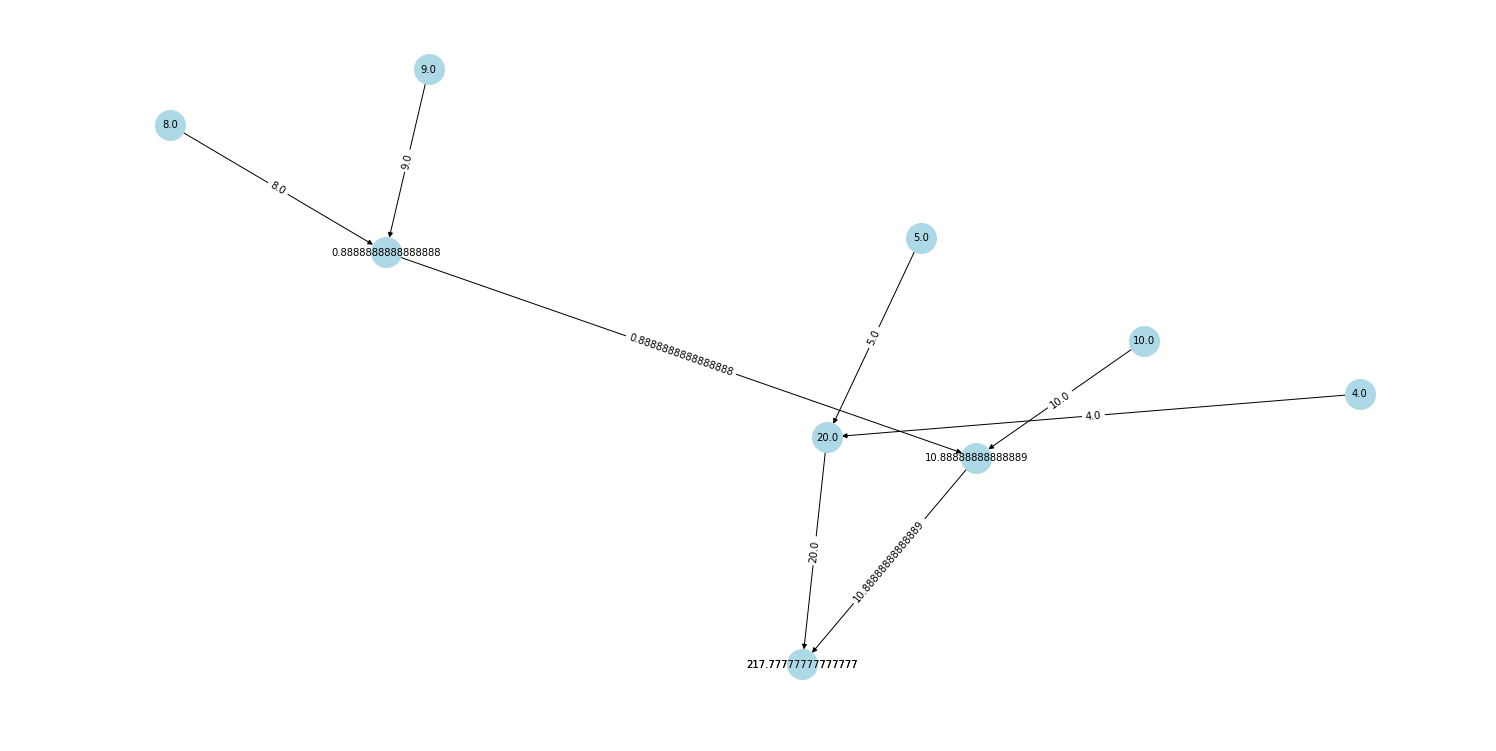

In [27]:
draw(x)

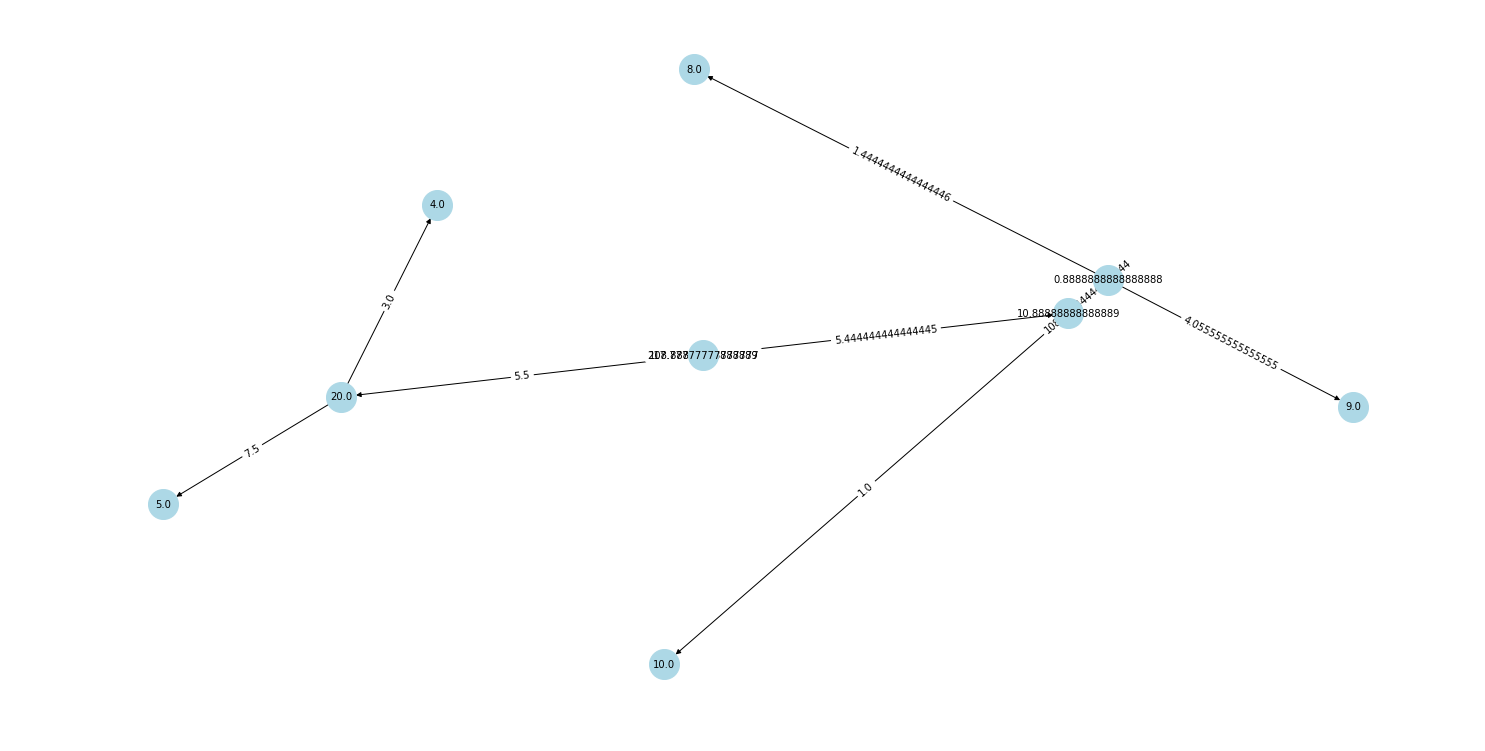

In [28]:
draw(y)